C:\Users\SOZHAN\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Titanic Dataset - Model Evaluation:
Logistic Regression Mean Accuracy: 0.7878, Std: 0.0301
Decision Tree Mean Accuracy: 0.7360, Std: 0.0228
Random Forest Mean Accuracy: 0.8061, Std: 0.0246
Neural Network Mean Accuracy: 0.7219, Std: 0.0310

Iris Dataset - Model Evaluation:
Logistic Regression Mean Accuracy: 0.9667, Std: 0.0486
Decision Tree Mean Accuracy: 0.9417, Std: 0.0565
Random Forest Mean Accuracy: 0.9500, Std: 0.0612
Neural Network Mean Accuracy: 0.9667, Std: 0.0486

Paired t-test: t-statistic = 1.1481, p-value = 0.2525

ANOVA Results: F-statistic = 0.4167, p-value = 0.7434

Chi-square test for Sex: chi2_stat = 260.7170, p-value = 0.0000
Chi-square test for Pclass: chi2_stat = 102.8890, p-value = 0.0000

ANOVA for Age: F-statistic = 4.3535, p-value = 0.0372
ANOVA for Fare: F-statistic = 63.0308, p-value = 0.0000


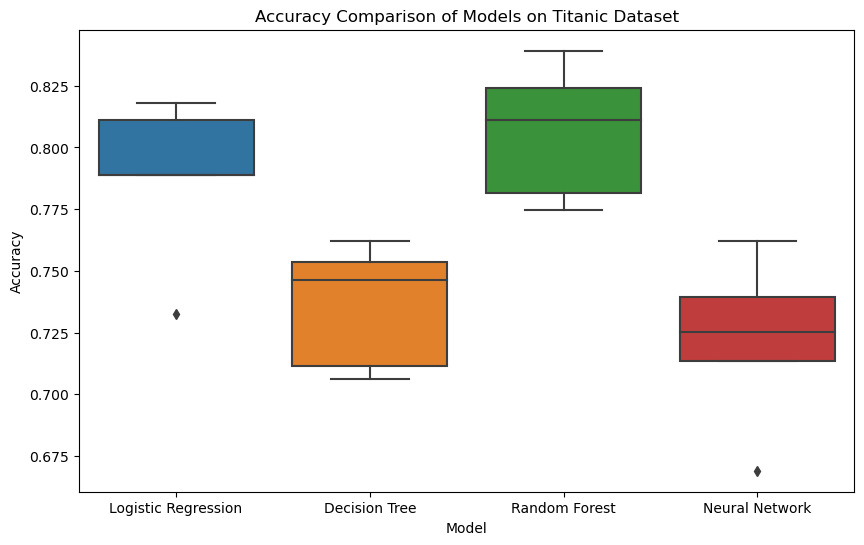

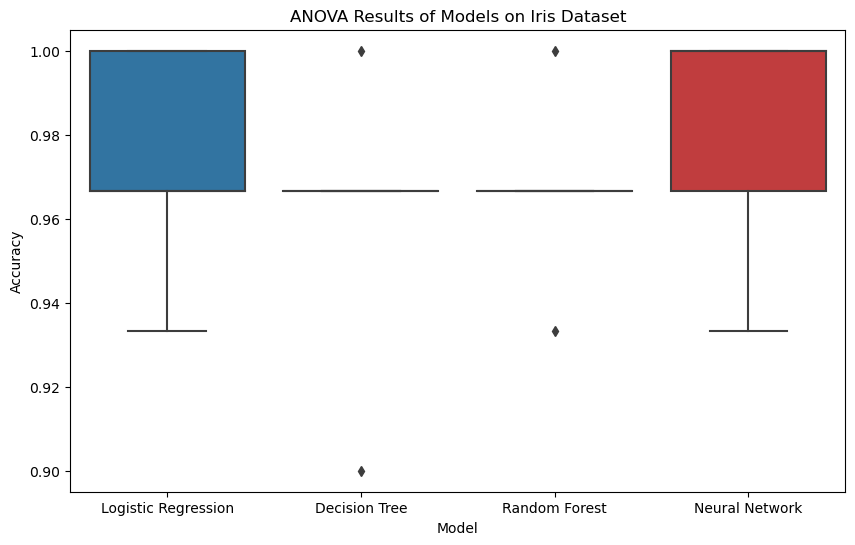

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel, f_oneway, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
# Titanic dataset
titanic = pd.read_csv('E:/New folder/titanic/train.csv')
# Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('E:/New folder/iris/iris.data', header=None, names=column_names)
# MNIST dataset (use sklearn for convenience)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Preprocessing function for Titanic dataset
def preprocess_titanic(df):
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
    return df

titanic = preprocess_titanic(titanic)

# Splitting Titanic dataset
X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic['Survived']
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Splitting Iris dataset
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Prepare MNIST data (scale and split)
X_mnist = mnist.data / 255.0
y_mnist = mnist.target
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Function to evaluate models using cross-validation
def evaluate_models(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[name] = cv_results
        print(f"{name} Mean Accuracy: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}")
    return results

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Evaluate models on Titanic dataset
print("Titanic Dataset - Model Evaluation:")
titanic_results = evaluate_models(models, X_train_titanic, y_train_titanic)

# Evaluate models on Iris dataset
print("\nIris Dataset - Model Evaluation:")
iris_results = evaluate_models(models, X_train_iris, y_train_iris)

# Paired t-test for Logistic Regression vs. Random Forest on Titanic dataset
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

# Train models
lr.fit(X_train_titanic, y_train_titanic)
rf.fit(X_train_titanic, y_train_titanic)

# Predict on test set
lr_preds = lr.predict(X_test_titanic)
rf_preds = rf.predict(X_test_titanic)

# Calculate accuracies
lr_accuracy = accuracy_score(y_test_titanic, lr_preds)
rf_accuracy = accuracy_score(y_test_titanic, rf_preds)

# Paired t-test
t_stat, p_val = ttest_rel(lr_preds, rf_preds)
print(f"\nPaired t-test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

# ANOVA for multiple models on Iris dataset
iris_model_accuracies = {
    'Logistic Regression': cross_val_score(lr, X_iris, y_iris, cv=5, scoring='accuracy'),
    'Decision Tree': cross_val_score(DecisionTreeClassifier(), X_iris, y_iris, cv=5, scoring='accuracy'),
    'Random Forest': cross_val_score(RandomForestClassifier(), X_iris, y_iris, cv=5, scoring='accuracy'),
    'Neural Network': cross_val_score(MLPClassifier(max_iter=1000), X_iris, y_iris, cv=5, scoring='accuracy')
}

# Perform ANOVA
anova_results = f_oneway(*iris_model_accuracies.values())
print(f"\nANOVA Results: F-statistic = {anova_results.statistic:.4f}, p-value = {anova_results.pvalue:.4f}")

# Chi-square tests for Titanic dataset features
contingency_table_sex = pd.crosstab(titanic['Sex_male'], titanic['Survived'])
chi2_stat, p, dof, ex = chi2_contingency(contingency_table_sex)
print(f"\nChi-square test for Sex: chi2_stat = {chi2_stat:.4f}, p-value = {p:.4f}")

contingency_table_pclass = pd.crosstab(titanic['Pclass'], titanic['Survived'])
chi2_stat, p, dof, ex = chi2_contingency(contingency_table_pclass)
print(f"Chi-square test for Pclass: chi2_stat = {chi2_stat:.4f}, p-value = {p:.4f}")

# ANOVA for numerical features
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]

anova_age = f_oneway(survived['Age'], not_survived['Age'])
print(f"\nANOVA for Age: F-statistic = {anova_age.statistic:.4f}, p-value = {anova_age.pvalue:.4f}")

anova_fare = f_oneway(survived['Fare'], not_survived['Fare'])
print(f"ANOVA for Fare: F-statistic = {anova_fare.statistic:.4f}, p-value = {anova_fare.pvalue:.4f}")

# Visualizations
# Accuracy comparison chart
results_df = pd.DataFrame.from_dict(titanic_results, orient='index').T
results_df = results_df.melt(var_name='Model', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison of Models on Titanic Dataset')
plt.show()

# ANOVA results chart
iris_results_df = pd.DataFrame.from_dict(iris_model_accuracies, orient='index').T
iris_results_df = iris_results_df.melt(var_name='Model', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=iris_results_df)
plt.title('ANOVA Results of Models on Iris Dataset')
plt.show()


SyntaxError: invalid syntax (525519296.py, line 1)